# Step 1 Importing Dataset and working with Statistics

In [9]:
#importing required liabraries.
import pandas as pd

In [10]:
#loading the McDonald's dataset
df = pd.read_csv('mcdonalds.csv')

In [11]:
#display some rows from dataset
df.head(5)


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [12]:
#display dataset statistics
df.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


# Step 2 Cleaning dataset

In [13]:
# checking missing values
df.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [14]:
# converting all "Yes"/"No" columns to 0/1
df = df.replace({'Yes': 1, 'No': 0})

In [15]:
# since the like column has different values, we have to map them into numerals.
ratings = {
    'I hate it!': -5,
    'I love it!': 5,
    '-3': -3,
    '-4': -4,
    '-2': -2,
    '-1': -1,
    '0': 0,
    '1': 1,
    '2': 2,
    '3': 3,
    '4': 4
}

# replacing text ratings with numeric values
df = df.replace(ratings, regex=True)

In [16]:
df.head(10)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,2,49,Once a month,Male
5,1,1,0,1,0,1,1,1,0,0,0,2,55,Every three months,Male
6,1,1,1,1,0,1,0,1,1,1,0,2,56,Every three months,Female
7,1,1,0,1,1,1,1,1,0,0,0,5,23,Once a week,Female
8,0,0,0,1,1,0,0,0,1,0,1,-5,58,Once a year,Male
9,1,1,0,1,1,1,0,1,1,0,0,1,32,Every three months,Female


# Step 3 Doing some EDA 

array([[<AxesSubplot: xlabel='yummy', ylabel='yummy'>,
        <AxesSubplot: xlabel='convenient', ylabel='yummy'>,
        <AxesSubplot: xlabel='spicy', ylabel='yummy'>,
        <AxesSubplot: xlabel='fattening', ylabel='yummy'>,
        <AxesSubplot: xlabel='greasy', ylabel='yummy'>,
        <AxesSubplot: xlabel='fast', ylabel='yummy'>,
        <AxesSubplot: xlabel='cheap', ylabel='yummy'>,
        <AxesSubplot: xlabel='tasty', ylabel='yummy'>,
        <AxesSubplot: xlabel='expensive', ylabel='yummy'>,
        <AxesSubplot: xlabel='healthy', ylabel='yummy'>,
        <AxesSubplot: xlabel='disgusting', ylabel='yummy'>,
        <AxesSubplot: xlabel='Like', ylabel='yummy'>,
        <AxesSubplot: xlabel='Age', ylabel='yummy'>],
       [<AxesSubplot: xlabel='yummy', ylabel='convenient'>,
        <AxesSubplot: xlabel='convenient', ylabel='convenient'>,
        <AxesSubplot: xlabel='spicy', ylabel='convenient'>,
        <AxesSubplot: xlabel='fattening', ylabel='convenient'>,
        <AxesSubpl

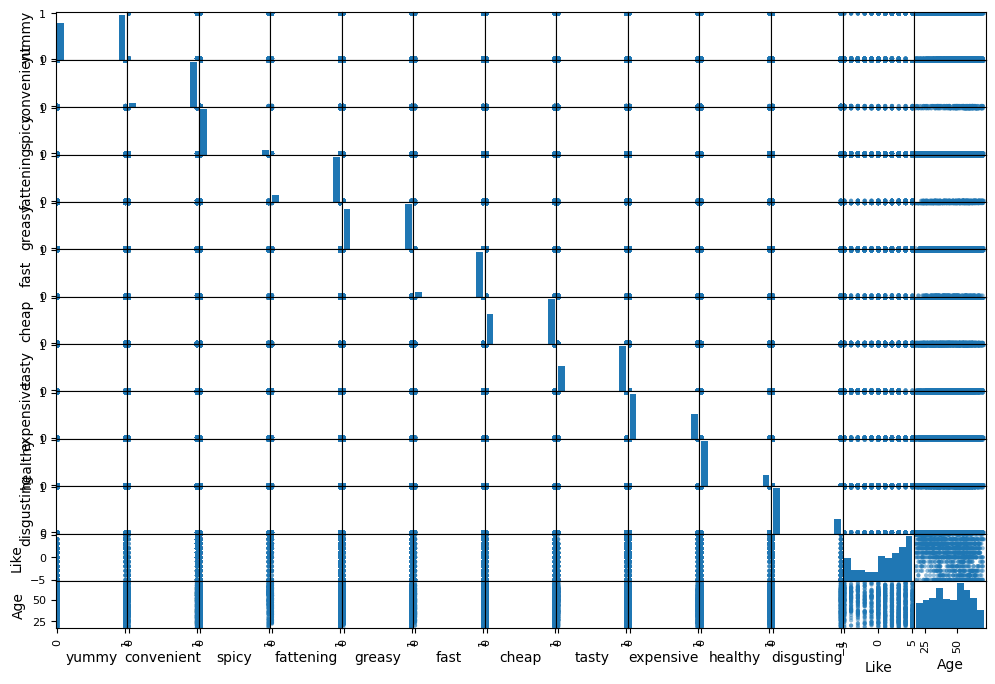

In [18]:
from pandas.plotting import  scatter_matrix

scatter_matrix(df[['yummy','convenient','spicy','fattening','greasy','fast','cheap','tasty','expensive','healthy','disgusting','Like','Age']], figsize=(12,8))

# Step 4 Pre processing the dataset

In [ ]:
#dropping some columns 
df = df.drop(columns = ['VisitFrequency','Gender'], axis = 1)

In [21]:
from sklearn.preprocessing import StandardScaler

# Selecting numerical features for clustering
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns

# Standardize the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[numerical_features])

# Create a DataFrame with the scaled data
df_scaled = pd.DataFrame(df_scaled, columns=numerical_features)


# Using K Means to extract segments

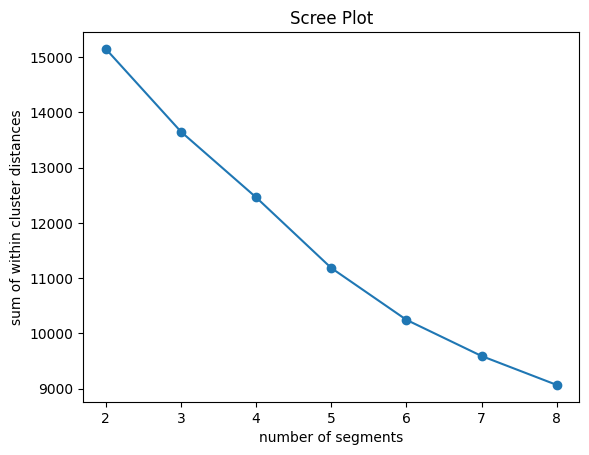

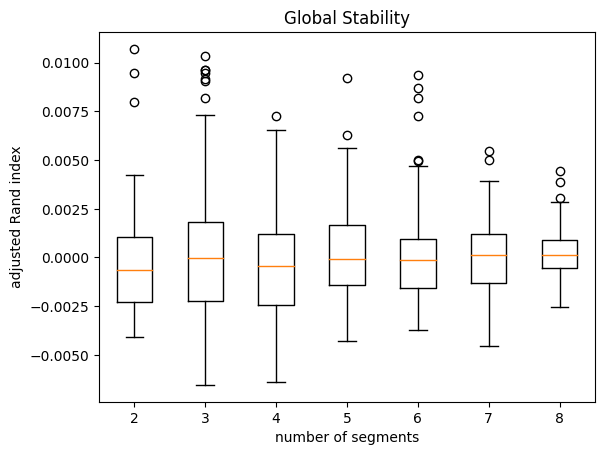

Segment stability values: [ 1.82035915e-04  5.85205689e-05  4.72905848e-06 -2.72200986e-04]


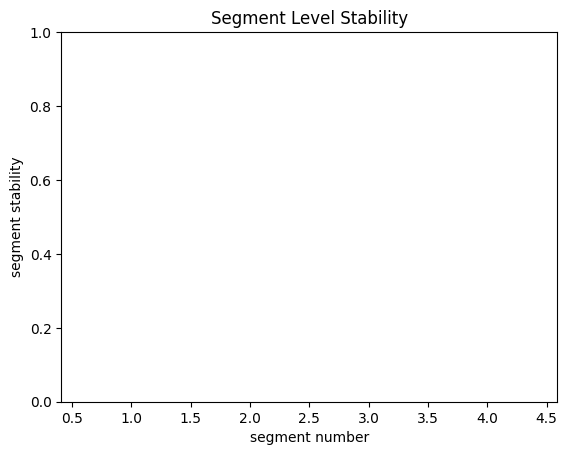

In [23]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.utils import resample
import matplotlib.pyplot as plt

# Assuming df_scaled is your preprocessed and scaled dataset
# Ensure df_scaled is a numpy array or pandas DataFrame

# Function to perform k-means clustering and return the results
def k_means_clustering(data, clusters_range, nrep):
    results = {}
    for k in clusters_range:
        km = KMeans(n_clusters=k, n_init=nrep, random_state=1234)
        km.fit(data)
        results[k] = km
    return results

# Function to relabel the clusters to ensure consistency across segmentations
# Placeholder function, assuming relabeling is not required
def relabel_clusters(results):
    # Implement relabeling logic based on the specifics of your data
    # For now, we return results as is
    return results

# Perform k-means clustering for 2 to 8 clusters
clusters_range = range(2, 9)
MD_km28 = k_means_clustering(df_scaled, clusters_range, nrep=10)
MD_km28 = relabel_clusters(MD_km28)

# Plot scree plot
scree_data = [km.inertia_ for k, km in MD_km28.items()]
plt.plot(clusters_range, scree_data, marker='o')
plt.xlabel('number of segments')
plt.ylabel('sum of within cluster distances')
plt.title('Scree Plot')
plt.show()

# Stability-based data structure analysis
def bootstrap_stability(data, clusters_range, nrep, nboot):
    stability = {k: [] for k in clusters_range}
    for k in clusters_range:
        original_labels = KMeans(n_clusters=k, n_init=nrep, random_state=1234).fit_predict(data)
        for _ in range(nboot):
            sample = resample(data)
            sampled_labels = KMeans(n_clusters=k, n_init=nrep, random_state=1234).fit_predict(sample)
            score = adjusted_rand_score(original_labels, sampled_labels)
            stability[k].append(score)
    return stability

MD_b28 = bootstrap_stability(df_scaled, clusters_range, nrep=10, nboot=100)

# Plot global stability
plt.boxplot([MD_b28[k] for k in clusters_range], labels=clusters_range)
plt.xlabel('number of segments')
plt.ylabel('adjusted Rand index')
plt.title('Global Stability')
plt.show()

# Save the four-segment solution
MD_k4 = MD_km28[4]

# Segment level stability within solutions
def segment_level_stability(data, km_result, nrep, nboot):
    stability = np.zeros(km_result.n_clusters)
    for _ in range(nboot):
        sample = resample(data)
        sampled_labels = KMeans(n_clusters=km_result.n_clusters, n_init=nrep, random_state=1234).fit_predict(sample)
        for i in range(km_result.n_clusters):
            stability[i] += adjusted_rand_score(km_result.labels_, sampled_labels == i)
    stability /= nboot
    return stability

MD_r4 = segment_level_stability(df_scaled, MD_k4, nrep=10, nboot=100)

# Debug: Print segment stability values
print("Segment stability values:", MD_r4)

# Plot segment level stability
plt.bar(range(1, len(MD_r4) + 1), MD_r4)
plt.ylim(0, 1)
plt.xlabel('segment number')
plt.ylabel('segment stability')
plt.title('Segment Level Stability')
plt.show()
